### Инструкция по выполнению проекта:

Вы - маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несколько прошлых месяцев ваш бизнес постоянно нес убытки - в привлечение пользователей была вложена куча денег, а толку никакого. Вам нужно разобраться в причинах этой ситуации.

У вас в распоряжении есть лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов. Вам предстоит изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отрицательно влияют на привлечение пользователей.

#### Шаг 1. Загрузите данные и подготовьте их к анализу
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info_short.csv. Скачать датасет
 -   /datasets/orders_info_short.csv. Скачать датасет
 -   /datasets/costs_info_short.csv. Скачать датасет
 
#### Шаг 2. Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

#### Шаг 3. Проведите исследовательский анализ данных

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?.

#### Шаг 4. Маркетинг
Выясните:

- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

#### Шаг 5. Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

Подумайте, нужно ли включать в анализ органических пользователей?

#### Шаг 6. Напишите выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

#### Оформление: 
Задание выполните в Jupyter Notebook. Программный код заполните в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Примените форматирование и заголовки.


#### Описание данных
Таблица visits_log_short (лог сервера с информацией о посещениях сайта):

    User Id — уникальный идентификатор пользователя
    Device — категория устройства пользователя
    Session start — дата и время начала сессии
    Session End — дата и время окончания сессии
    Channel — идентификатор рекламного источника, из которого пришел пользователь
    Region - страна пользователя

Таблица orders_log_short (информация о заказах):

    User Id — уникальный id пользователя, который сделал заказ
    Event Dt — дата и время покупки
    Revenue — выручка

Таблица costs_short (информация о затратах на маркетинг):

    Channel — идентификатор рекламного источника
    Dt — дата
    Costs — затраты на этот рекламный источник в этот день

# Шаг 1. Загрузите данные и подготовьте их к анализу
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info_short.csv. 
 -   /datasets/orders_info_short.csv. 
 -   /datasets/costs_info_short.csv.

Импортируем библиотеки, необходимые для анализа

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [88]:
orders = pd.read_csv('/datasets/orders_info_short.csv')
orders.info()
orders.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


,count,mean,std,min,25%,50%,75%,max
User Id,40212.0,4.990295e+11,2.860937e+11,599326.00,2.511324e+11,4.982840e+11,7.433327e+11,9.998954e+11
Revenue,40212.0,5.370608e+00,3.454208e+00,4.99,4.990000e+00,4.990000e+00,4.990000e+00,4.999000e+01


In [4]:
costs = pd.read_csv('/datasets/costs_info_short.csv')
costs.info()
costs.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,count,mean,std,min,25%,50%,75%,max
costs,1800.0,58.609611,107.740223,0.8,6.495,12.285,33.6,630.0


In [89]:
costs

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8


Приведем названия столбцов к нижнему регистру

In [5]:
new_cols = []
for i in orders.columns:
    new_cols += [i.lower().replace(' ','_')]
orders.columns = new_cols 
orders.columns

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

In [6]:
new_cols = []
for i in visits.columns:
    new_cols += [i.lower().replace(' ','_')]
visits.columns = new_cols 
visits.columns

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

In [7]:
new_cols = []
for i in costs.columns:
    new_cols += [i.lower().replace(' ','_')]
costs.columns = new_cols 
costs.columns

Index(['dt', 'channel', 'costs'], dtype='object')

Преобразуем типы данных

In [8]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date
visits['user_id'] = visits['user_id'].astype('str')
orders['user_id'] = orders['user_id'].astype('str')

Все данные в необходимом формате, пропуски отсутствуют

In [9]:
visits.duplicated().sum()

0

In [10]:
orders.duplicated().sum()

0

In [11]:
costs.duplicated().sum()

0

# Шаг 2. Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

In [12]:
visits.head(1)

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01


In [13]:
#функция для создания пользовательских профилей с датой первого посещения и источником перехода на сайт 
def get_profiles(sessions, orders, ad_costs):
    # находим параметры первых посещений
    profiles = (sessions.sort_values(by=['user_id', 'session_start']).groupby('user_id').agg({
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first'}
        ).rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
 
    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
 
    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
 
 
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
 
    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')
 
    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
 
    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )
 
    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    return profiles

In [14]:
#функция для расчёта коэффициента удержания
def get_retention(profiles, sessions, observation_date, horizon_days, dimensions = [], ignore_horizon = False):
    
    # решаем какие столбцы оставим для группировки удержания, столбец признака платящего пользователя остается всегда
    dimensions = ['payer'] + dimensions
    
    # оттсекаем всех пользователей, которые не могли "дожить" до нужного горизонта 
    # (присоединились позже чем observation_date - horizon)
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days = horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # формируем массив сырых данных
    result_raw = result_raw.merge(sessions[['user_id', 'session_start']], on = 'user_id', how = 'left')
    result_raw['lifetime'] = (result_raw['session_start'] - result_raw['first_ts']).dt.days
    
    # функция группировки по нужному набору измерений
    def group_by_dimensions(df, dims, horizon_days):     
        result = df.pivot_table(index = dims, columns = 'lifetime', values = 'user_id', aggfunc = 'nunique')     # строим "треугольную таблицу" 
        cohort_sizes = df.groupby(dims).agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'cohort_size'}) # определяем размеры когорт
        result = cohort_sizes.merge(result, on = dims, how = 'left').fillna(0)                                   # присоединяем размеры когорт к треугольной таблице
        result = result.div(result['cohort_size'], axis = 0)                                                     # делим каждый из столбцов на размер когорты - расчитываем % удержания (retention rate)
        result = result[['cohort_size'] + list(range(horizon_days))]                                             # оставляем только наблюдения до нужного горизонта и столбец размеров когорт
        result['cohort_size'] = cohort_sizes                                                                     # пересприсваиваем столбец размеров когорт, ведь во время деления он превратился в 1
        return result
    
    # расчитываем удержание 
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    # рассчитываем удержание по всем параметрам + дата
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)
    
    # возвращаем и таблицы удержания и сырые данные (чтобы в случае чего можно было в них покопаться при отладке)
    return result_raw, result_grouped, result_in_time

In [15]:
#функция для расчёта конверсии 
def get_conversion(
    profiles,
    purchases,  # заменили sessions
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # Шаг 1. Получить пользовательские профили и данные о покупках
    # передаём их в качестве аргументов profiles и purchases

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Шаг 2. Найти дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # Шаг 3. Добавить данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # Шаг 4. Рассчитать лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):

        # Шаг 5. Построить таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )

        # Шаг 6. Посчитать сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)

        # Шаг 7. Вычислить размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        # Шаг 8. Объединить таблицы размеров когорт и конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # Шаг 9. Разделить каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)

        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [16]:
#функция для расчёта «пожизненной ценности» клиентов
def get_ltv(
    profiles,  # Шаг 1. Получить профили и данные о покупках
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Шаг 2. Добавить данные о покупках в профили

    result_raw = result_raw.merge(
        # добавляем в профили время совершения покупок и выручку
        purchases[['user_id', 'event_dt', 'revenue']],
        on='user_id',
        how='left',
    )

    # Шаг 3. Рассчитать лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):

        # Шаг 3. Построить таблицу выручки
        # строим «треугольную» таблицу
        result = df.pivot_table(
            index=dims,
            columns='lifetime',
            values='revenue',  # в ячейках — выручка за каждый лайфтайм
            aggfunc='sum',
        )

        # Шаг 4. Посчитать сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)

        # Шаг 5. Вычислить размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        # Шаг 6. Объединить размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # Шаг 7. Посчитать LTV
        # делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу LTV
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики LTV убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []
    # получаем таблицу динамики LTV
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы LTV и сырые данные
    return result_raw, result_grouped, result_in_time

In [17]:
def get_ltv5(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [18]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [19]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [20]:
def plot_retention(retention):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержания первого дня
    retention = retention.drop(columns=['cohort_size', 0])

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке — кривые удержания неплатящих
    ax2 = plt.subplot(2, 2, 2)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    plt.show()

In [21]:
def plot_retention7(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в четвёртой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()
    
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

# Шаг 3. Проведите исследовательский анализ данных

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

In [22]:
profiles = get_profiles(visits, orders, costs)
profiles.head(1)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,100002830880,2019-10-17 12:25:34,organic,Android,United States,2019-10-17,2019-10-01,False,0.0


In [23]:
profiles['dt'].min()

datetime.date(2019, 5, 1)

In [24]:
profiles['dt'].max()

datetime.date(2019, 10, 27)

Минимальная дата - 01 мая 2019.
Максимальная дата - 27 октября 2019.

In [25]:
region_all = profiles.groupby('region').agg({'user_id': 'nunique'}).sort_values(by='user_id', ascending=False)

In [26]:
region_payer = profiles.query('payer == True').groupby('region').agg({'user_id': 'nunique'}).sort_values(by='user_id', ascending=False)

In [27]:
region = region_all.merge(region_payer, on='region')
region['%'] = region['user_id_y'] / region['user_id_x']*100
region

,user_id_x,user_id_y,%
region,,,
United States,100002,6902,6.901862
UK,17575,700,3.982930
France,17450,663,3.799427
Germany,14981,616,4.111875


Пользователи приходят из 4 стран: США, Великобритания, Франция и Германия.
Наибольшее количество привлеченных пользователей приходится на США - более 100 тыс. пользователей, на которых приходится почти 7% или 6,9 тыс. платящих пользователей 

In [28]:
profiles.head(1)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,100002830880,2019-10-17 12:25:34,organic,Android,United States,2019-10-17,2019-10-01,False,0.0


In [29]:
device_all = profiles.groupby('device').agg({'user_id': 'nunique'}).sort_values(by='user_id', ascending=False)
device_all

,user_id
device,
iPhone,54479
Android,35032
PC,30455
Mac,30042


In [30]:
device_payer = profiles.query('payer == True').groupby('device').agg({'user_id': 'nunique'}).sort_values(by='user_id', ascending=False)
device_payer

,user_id
device,
iPhone,3382
Android,2050
Mac,1912
PC,1537


In [31]:
device = device_all.merge(device_payer, on='device')
device['%'] = device['user_id_y'] / device['user_id_x']*100
device

,user_id_x,user_id_y,%
device,,,
iPhone,54479,3382,6.207897
Android,35032,2050,5.851793
PC,30455,1537,5.046790
Mac,30042,1912,6.364423


Пользователи используют iPhone, Android, PC и Mac. По общему количеству пользователей и по платящим клиентам лидирует iPhone - более 50 тыс. пользователей из них 3 тыс. платящих.

In [32]:
profiles.head(1)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,100002830880,2019-10-17 12:25:34,organic,Android,United States,2019-10-17,2019-10-01,False,0.0


In [33]:
channel_all = profiles.groupby('channel').agg({'user_id': 'nunique'}).sort_values(by='user_id', ascending=False)
channel_all

,user_id
channel,
organic,56439
FaceBoom,29144
TipTop,19561
OppleCreativeMedia,8605
LeapBob,8553
WahooNetBanner,8553
RocketSuperAds,4448
MediaTornado,4364
YRabbit,4312


In [34]:
channel_payer = profiles.query('payer == True').groupby('channel').agg({'user_id': 'nunique'}).sort_values(by='user_id', ascending=False)
channel_payer

,user_id
channel,
FaceBoom,3557
TipTop,1878
organic,1160
WahooNetBanner,453
AdNonSense,440
RocketSuperAds,352
LeapBob,262
OppleCreativeMedia,233
lambdaMediaAds,225


In [35]:
channel = channel_all.merge(channel_payer, on='channel')
channel['%'] = channel['user_id_y'] / channel['user_id_x']*100
channel

,user_id_x,user_id_y,%
channel,,,
organic,56439,1160,2.055316
FaceBoom,29144,3557,12.204914
TipTop,19561,1878,9.600736
OppleCreativeMedia,8605,233,2.707728
LeapBob,8553,262,3.063253
WahooNetBanner,8553,453,5.296387
RocketSuperAds,4448,352,7.913669
MediaTornado,4364,156,3.574702
YRabbit,4312,165,3.826531


Привлечение шло по 10 каналам. Наибольшее количество платящих клиентов принесли:
FaceBoom 3,5 тыс. пользоватей или 12% от количества привлеченных этим каналом
TipTop 1,8 тыс пользоватей или 10% от количества привлеченных этим каналом

Таким образом, преимущественно платящие клиенты находятся в США, имеют iPhone и получили информацию из социальных сетей.

# Шаг 4. Маркетинг

Выясните:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

In [36]:
profiles.head(1)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,100002830880,2019-10-17 12:25:34,organic,Android,United States,2019-10-17,2019-10-01,False,0.0


In [37]:
profiles['acquisition_cost'].sum()

105497.3

In [38]:
profiles.groupby('channel').agg({'acquisition_cost': 'sum'}).sort_values(by='acquisition_cost', ascending=False)

,acquisition_cost
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


In [39]:
profiles.groupby('month').agg({'acquisition_cost': 'sum'}).sort_values(by='acquisition_cost', ascending=False)

,acquisition_cost
month,
2019-09-01,22441.340
2019-10-01,20882.415
2019-08-01,20657.870
2019-07-01,16447.060
2019-06-01,15090.045
2019-05-01,9978.570


In [40]:
month = profiles.groupby('month')['acquisition_cost'].sum().reset_index()
month

,month,acquisition_cost
0,2019-05-01,9978.570
1,2019-06-01,15090.045
2,2019-07-01,16447.060
3,2019-08-01,20657.870
4,2019-09-01,22441.340
5,2019-10-01,20882.415


In [41]:
costs.head()

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


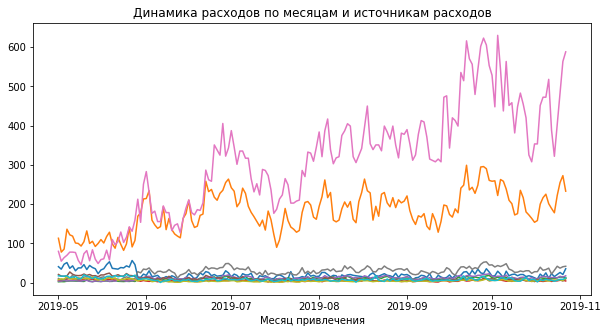

In [42]:
costs_per_month = pd.pivot_table(
                            costs,
                            index='channel',
                            columns='dt',
                            values='costs',
                            aggfunc='sum' 
                            )

plt.figure(figsize=(10, 5))
plt.plot(costs_per_month.T)
plt.xlabel('Месяц привлечения')
plt.title('Динамика расходов по месяцам и источникам расходов')
plt.show()

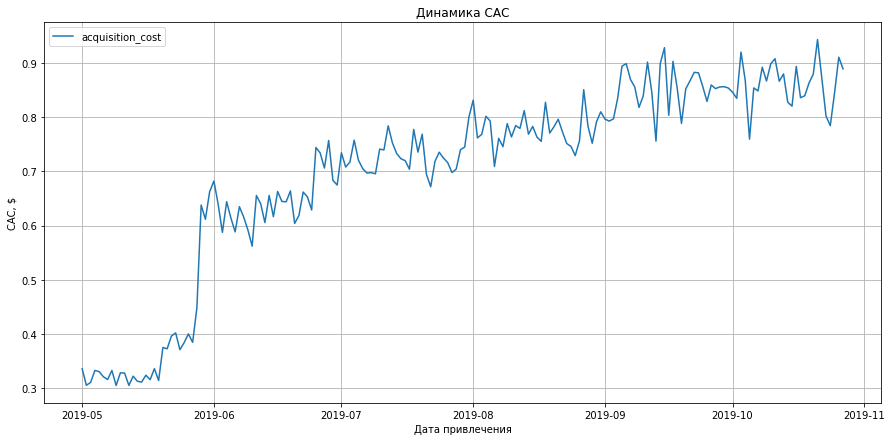

In [43]:
profiles.pivot_table(
    index='dt', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(15, 7))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС')
plt.show()

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0
channel,,,,,,,,
AdNonSense,3825,0.508358,0.592382,0.647176,0.686316,0.708756,0.735116,0.755990
FaceBoom,28691,0.583751,0.659521,0.699041,0.727428,0.745693,0.758390,0.772687
LeapBob,8428,0.108249,0.157988,0.206538,0.235788,0.260300,0.289905,0.315602
MediaTornado,4313,0.137459,0.189757,0.247839,0.292982,0.332571,0.366126,0.388108
OppleCreativeMedia,8479,0.100402,0.134541,0.174806,0.211301,0.245563,0.270869,0.294999
RocketSuperAds,4395,0.208717,0.317283,0.399031,0.459206,0.521427,0.577288,0.645433
TipTop,19230,0.344485,0.499993,0.625813,0.742811,0.845065,0.937196,1.014792
WahooNetBanner,8416,0.191419,0.290583,0.376928,0.441560,0.515324,0.567029,0.627546
YRabbit,4247,0.164775,0.213186,0.255484,0.302955,0.353501,0.385225,0.411074


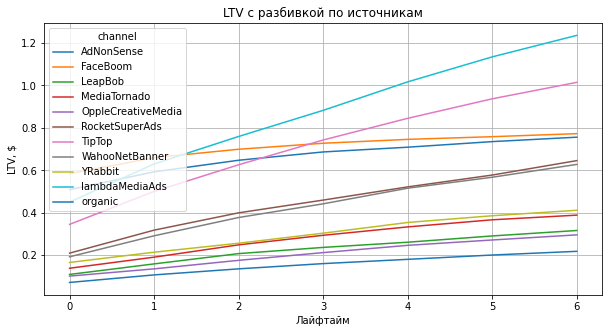

In [44]:
ltv_raw, ltv, ltv_history = get_ltv(
    profiles, orders, datetime(2019, 10, 31).date(), 7, dimensions=['channel']
)

# таблица LTV
display(ltv)

# кривые LTV
report = ltv.drop(columns=['cohort_size'])
report.T.plot(grid=True, figsize=(10, 5), xticks=list(report.columns.values))
plt.title('LTV с разбивкой по источникам')
plt.ylabel('LTV, $')
plt.xlabel('Лайфтайм')
plt.show()

In [45]:
# определение среднего CAC на одного пользователя для всего проекта
costs['costs'].sum() / profiles.query('channel != "organic"')['user_id'].count()

1.127481323942759

In [46]:
#cредний САС по каналам без разбивки на когорты
report = profiles.groupby('channel')['acquisition_cost'].agg(
    ['mean']).sort_values(by='mean', ascending=False)
 
report

,mean
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


Таким образом, общая сумма затрат на рекламу составила 105,5 тыс. долларов. Более 50% от общих затрат на рекламу были направлены на канал TipTop.
Стоимость привлечения «органических» пользователей во всех когортах равна нулю, потому что они пришли самостоятельно, а не благодаря рекламе. Привлечение одного пользователя из FaceBoom обошлось компании в среднем в 1 доллар, а из TipTop — заметно увеличение трат на рекламу в этом секторе почти в 3 раза и к концу анализируемого периода составило примерно 3,5 доллара.
Наибольшая сумма затрат на рекламу была произведена в сентябре 2019 года в 2 раза больше, чем на начало анализируемого периода.

# Шаг 5. Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

### Проанализируйте общую окупаемость рекламы

In [47]:
profiles.head(1)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,100002830880,2019-10-17 12:25:34,organic,Android,United States,2019-10-17,2019-10-01,False,0.0


In [48]:
profiles = profiles.query('channel != "organic"')

In [49]:
# находим максимальную дату привлечения из сырых данных LTV
max_acquitision_dt = ltv_raw['dt'].max()
# отсекаем профили, которые «старше» этой даты
ltv_profiles = profiles.query('dt <= @max_acquitision_dt')

# оставшееся число пользователей на каждый лайфтайм
ltv_month = ltv_profiles.groupby('month').agg({'user_id': 'nunique'}).sort_values(by='user_id', ascending=False).head()
ltv_month

,user_id
month,
2019-08-01,17545
2019-09-01,17303
2019-06-01,15315
2019-07-01,14941
2019-10-01,14619


In [50]:
cac = (ltv_profiles.groupby('month').agg({'acquisition_cost': 'mean'}).rename(columns={'acquisition_cost': 'cac'}))
cac

,cac
month,
2019-05-01,0.803686
2019-06-01,0.985311
2019-07-01,1.100800
2019-08-01,1.177422
2019-09-01,1.296962
2019-10-01,1.297139


In [51]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv5(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=[]
)
roi

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,,
All users,88644,1.117794,0.309163,0.389834,0.451341,0.501962,0.547002,0.58541,0.620991,0.652873,0.684043,0.712711,0.739091,0.762278,0.785579,0.806974


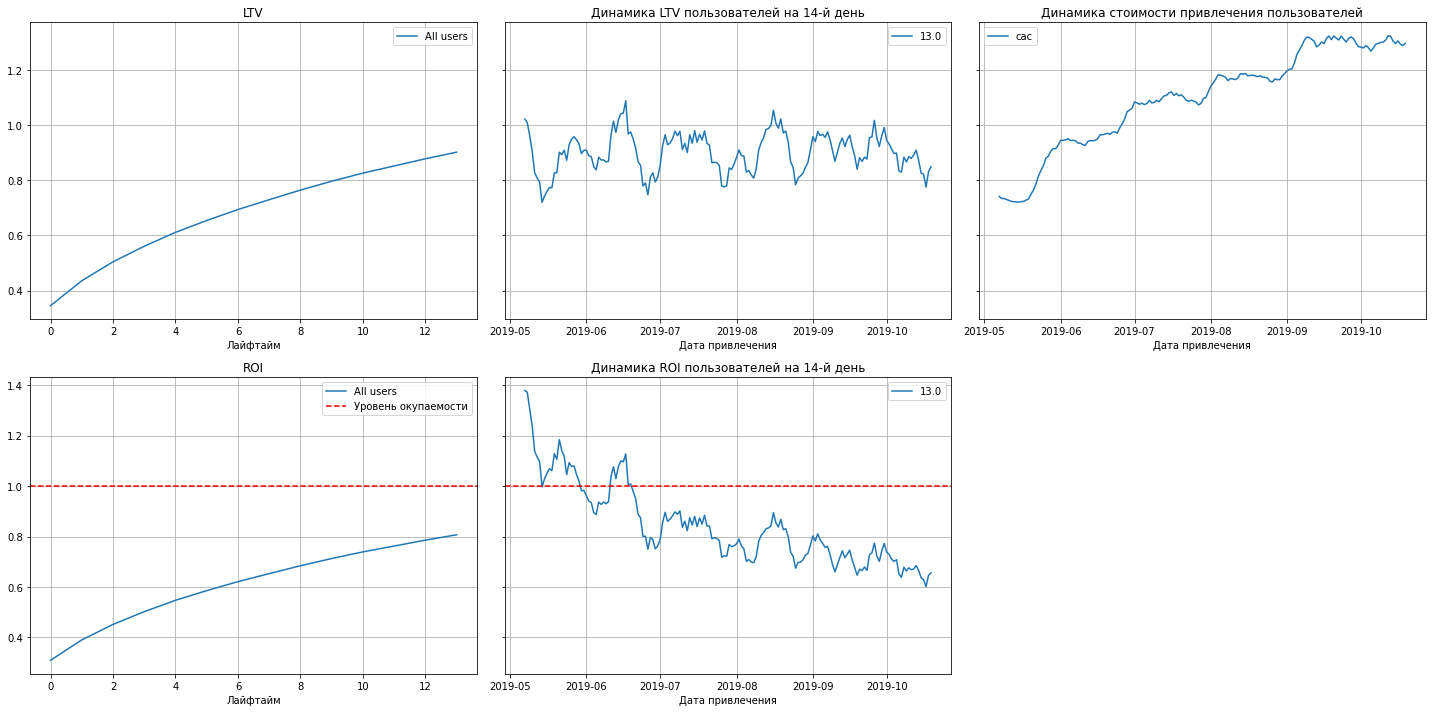

In [52]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14) 

In [53]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['month']
)

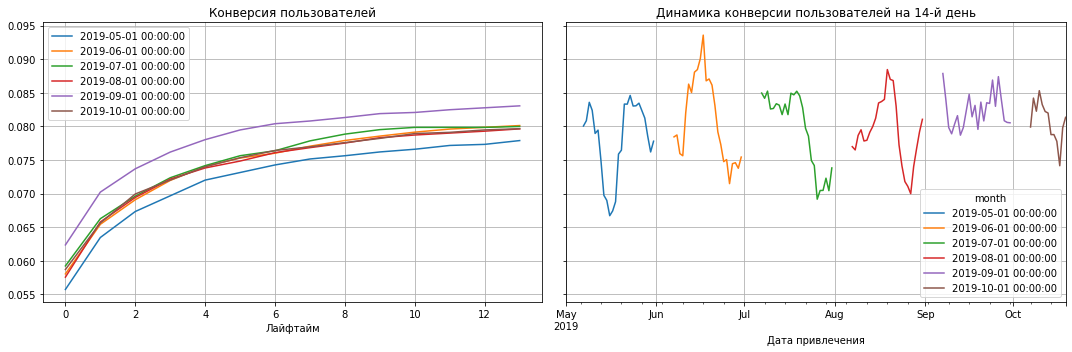

In [54]:
plot_conversion(conversion, conversion_history, 14) 

In [55]:
retention_raw, retention, retention_history = get_retention(
    profiles,
    visits,
    datetime(2019, 11, 1).date(),
    14,
    dimensions=['month'],
)
 

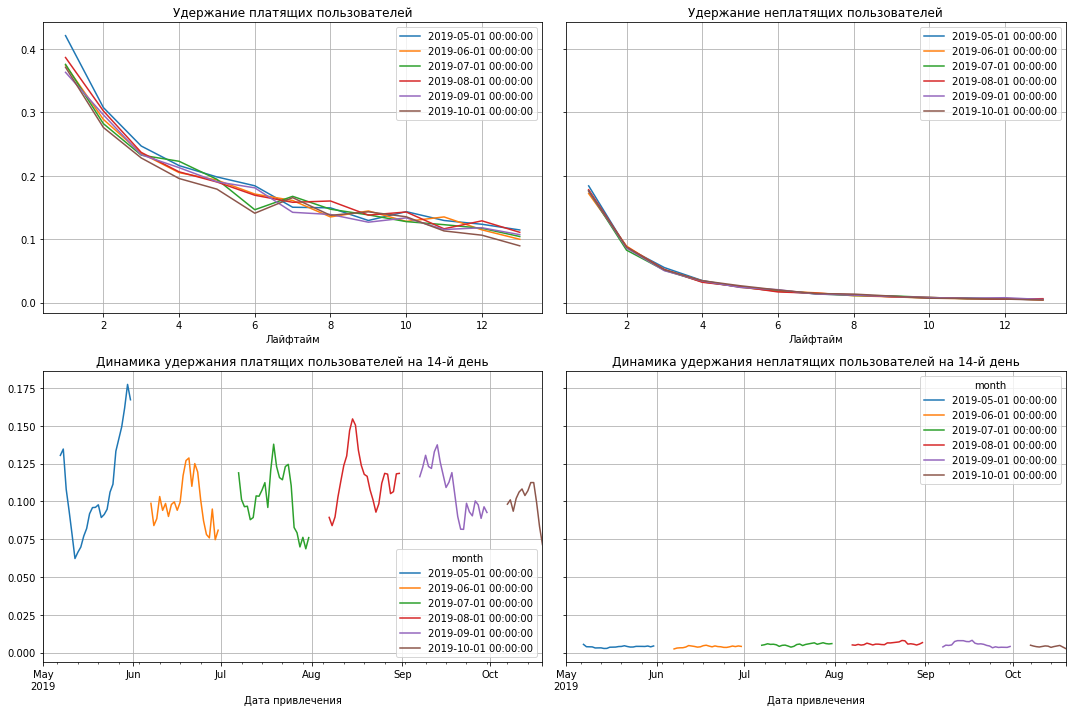

In [56]:
plot_retention7(retention, retention_history, 14) 

Выручка в данных о заказах недельный LTV пользователей, зарегистрировавшихся в начале мая, составил 50 цент.

### Проанализируйте окупаемость рекламы с разбивкой по устройствам

In [57]:
profiles.head(1)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
1,10000484057,2019-06-29 20:23:14,lambdaMediaAds,Mac,Germany,2019-06-29,2019-06-01,False,0.7


In [58]:
# LTV с разбивкой по устройствам
ltv_raw, ltv, ltv_history = get_ltv(profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['device'])

# таблица LTV
display(ltv)

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
device,,,,,,,,,,,,,,,
Android,20683,0.339218,0.430766,0.500209,0.555218,0.608159,0.661395,0.699810,0.738562,0.773986,0.806850,0.833871,0.856068,0.887970,0.912098
Mac,17747,0.382235,0.480219,0.550124,0.605077,0.651197,0.685782,0.721831,0.752874,0.790957,0.825376,0.857376,0.884370,0.904617,0.930541
PC,18128,0.277400,0.361536,0.430422,0.485652,0.539617,0.581623,0.631240,0.661959,0.701004,0.729414,0.761510,0.788708,0.812106,0.836167
iPhone,32086,0.367928,0.456307,0.523902,0.583165,0.632132,0.673563,0.710708,0.749656,0.779956,0.812214,0.840427,0.867426,0.894400,0.916983


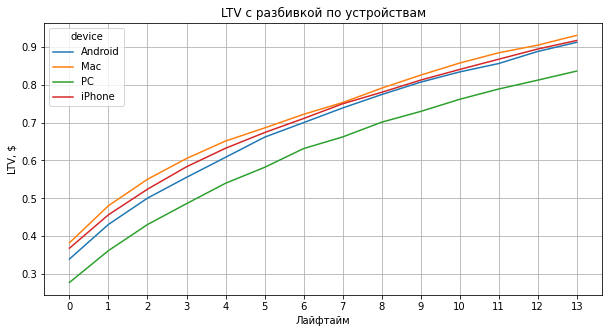

In [59]:
# кривые LTV
report = ltv.drop(columns=['cohort_size'])
report.T.plot(grid=True, figsize=(10, 5), xticks=list(report.columns.values))
plt.title('LTV с разбивкой по устройствам')
plt.ylabel('LTV, $')
plt.xlabel('Лайфтайм')
plt.show()

In [60]:
# находим максимальную дату привлечения из сырых данных LTV
max_acquitision_dt = ltv_raw['dt'].max()
# отсекаем профили, которые «старше» этой даты
ltv_profiles = profiles.query('dt <= @max_acquitision_dt')

# оставшееся число пользователей на каждый лайфтайм
ltv_profiles.groupby('dt').agg({'user_id': 'nunique'}).sort_values(by='user_id', ascending=False).head()

,user_id
dt,
2019-09-29,859
2019-09-28,850
2019-09-27,777
2019-09-22,768
2019-09-30,764


In [61]:
# считаем средний CAC по каналам привлечения

cac = (ltv_profiles.groupby('device').agg({'acquisition_cost': 'mean'}).rename(columns={'acquisition_cost': 'cac'}))
cac

,cac
device,
Android,1.019759
Mac,1.276219
PC,0.792724
iPhone,1.277021


In [62]:
# рассчитываем LTV и ROI
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv5(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['device'])
roi

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
device,,,,,,,,,,,,,,,,
Android,20683,1.019759,0.332645,0.422419,0.490517,0.544460,0.596376,0.648580,0.686250,0.724251,0.758989,0.791216,0.817714,0.839481,0.870765,0.894425
Mac,17747,1.276219,0.299506,0.376283,0.431058,0.474117,0.510255,0.537354,0.565601,0.589926,0.619766,0.646735,0.671809,0.692961,0.708825,0.729139
PC,18128,0.792724,0.349933,0.456068,0.542966,0.612637,0.680712,0.733701,0.796291,0.835044,0.884297,0.920135,0.960624,0.994933,1.024449,1.054801
iPhone,32086,1.277021,0.288114,0.357321,0.410253,0.456661,0.495005,0.527449,0.556536,0.587035,0.610762,0.636023,0.658115,0.679258,0.700380,0.718064


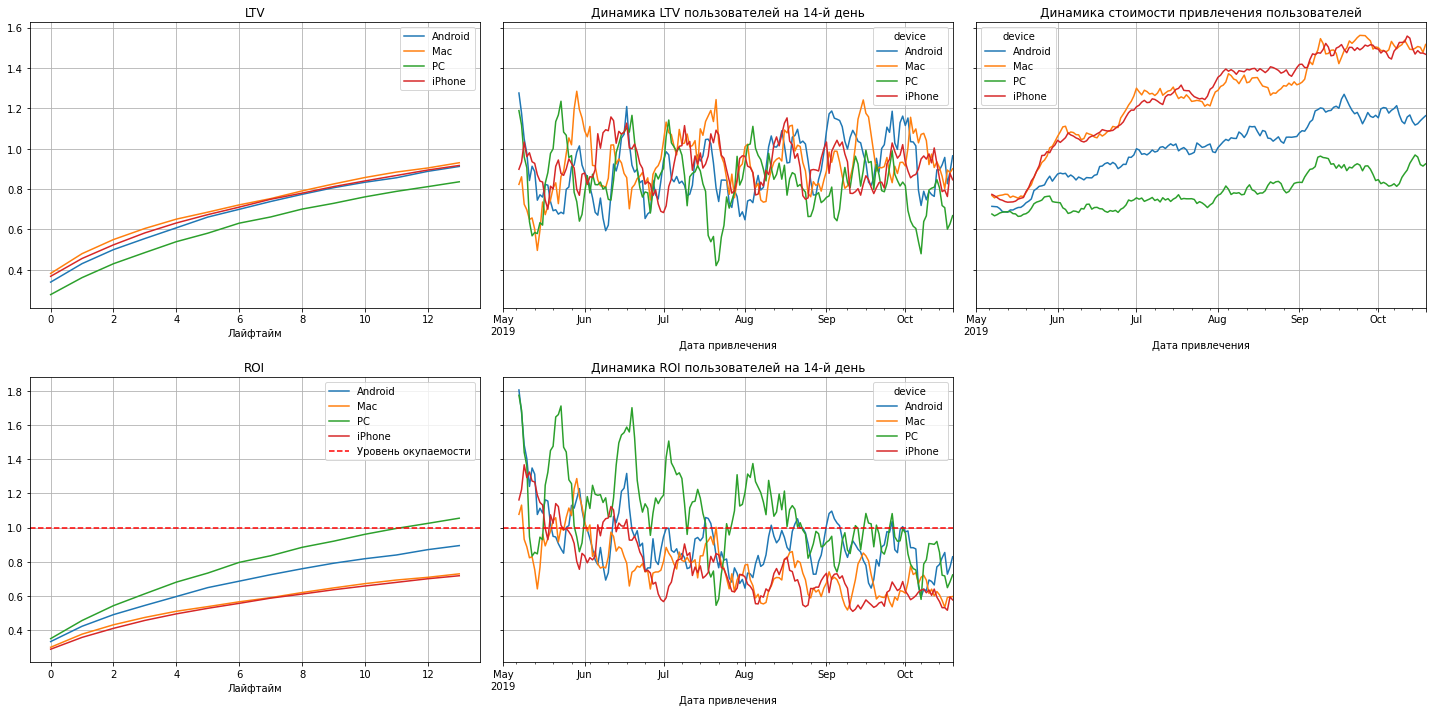

In [63]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14) 

In [64]:
retention_raw, retention, retention_history = get_retention(
    profiles, visits, datetime(2019, 11, 1).date(), 14, dimensions=['device'])

retention

cohort_size    0         1         2         3         4  \
payer device                                                              
False Android        18988  1.0  0.174953  0.086476  0.051928  0.031336   
      Mac            16150  1.0  0.179195  0.085635  0.049412  0.033065   
      PC             16920  1.0  0.174704  0.087234  0.052364  0.034574   
      iPhone         29276  1.0  0.178098  0.086829  0.052774  0.034533   
True  Android         1695  1.0  0.384661  0.298525  0.250147  0.214159   
      Mac             1597  1.0  0.365059  0.284283  0.202880  0.196619   
      PC              1208  1.0  0.421358  0.333609  0.262417  0.261589   
      iPhone          2810  1.0  0.370463  0.277224  0.233808  0.193594   

                      5         6         7         8         9        10  \
payer device                                                                
False Android  0.024015  0.017485  0.013798  0.011060  0.010006  0.007742   
      Mac      0.023901  0.019505  0.014551  0.012755  0.009102  0.007988   
      PC       0.024232  0.017790  0.014539  0.011170  0.008747  0.007033   
      iPhone   0.025857  0.019436  0.014039  0.011921  0.009940  0.007310   
True  Android  0.206490  0.156342  0.166372  0.146903  0.137463  0.132743   
      Mac      0.172198  0.148403  0.142768  0.136506  0.132123  0.120852   
      PC       0.209437  0.225166  0.192053  0.175497  0.149834  0.163907   
      iPhone   0.185053  0.158363  0.144128  0.135943  0.132384  0.132028   

                     11        12        13  
payer device                                 
False Android  0.006530  0.005477  0.005056  
      Mac      0.006440  0.006254  0.004025  
      PC       0.005437  0.005851  0.005556  
      iPhone   0.006832  0.006319  0.004372  
True  Android  0.110914  0.128614  0.107375  
      Mac      0.115216  0.108954  0.110833  
      PC       0.148179  0.144040  0.124172  
      iPhone   0.120996  0.107473  0.091815

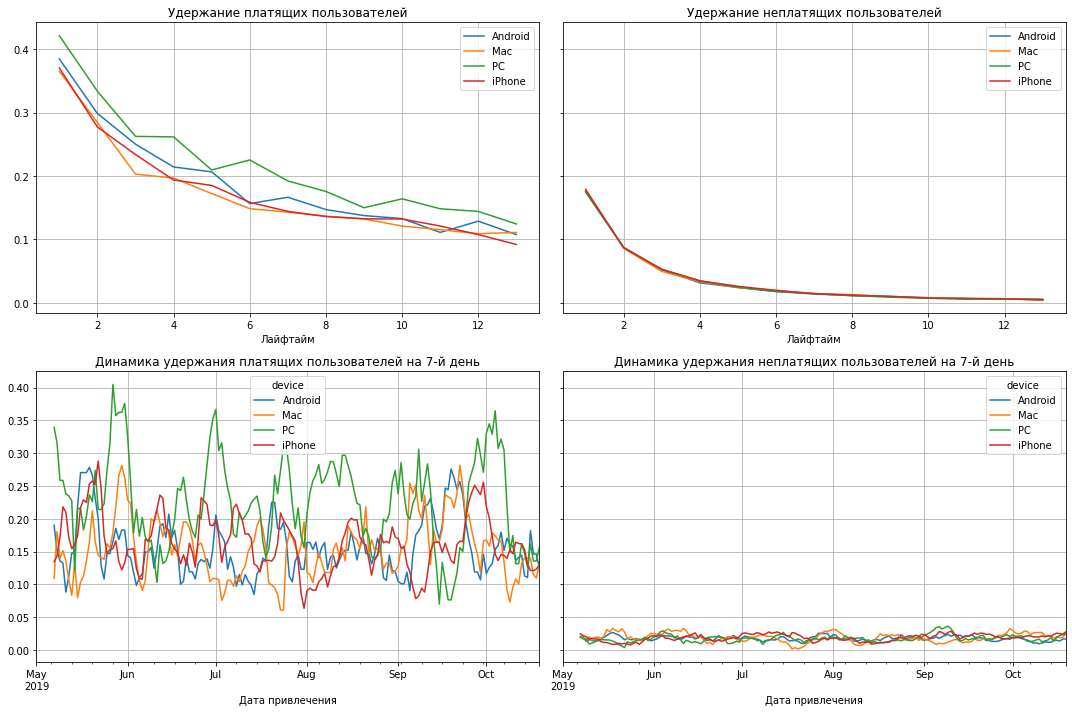

In [65]:
plot_retention7(retention, retention_history, 7) 

Таким образом, судя по графику, самый высокий LTV — у пользователей Mac. Затем идут iPhone и Android. Пользователи PC приносят меньше всего выручки.
Стоимость привлечения пользователей Mac и iPhone выше, чем стоимость привлечения Android и PC, сильных разрывов нет.
ROI окупаемость рекламы провалилась по всем устройствам, но при этом реклама на PC в отдельные периоды превышала точку окупаемости.

### Проанализируйте окупаемость рекламы с разбивкой по странам

In [66]:
profiles.head(1)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
1,10000484057,2019-06-29 20:23:14,lambdaMediaAds,Mac,Germany,2019-06-29,2019-06-01,False,0.7


In [67]:
# LTV с разбивкой по устройствам
ltv_raw, ltv, ltv_history = get_ltv(profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['region'])

# таблица LTV
display(ltv)

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
region,,,,,,,,,,,,,,,
France,10516,0.193428,0.259783,0.311696,0.360199,0.406892,0.450173,0.481019,0.507213,0.541484,0.570906,0.600042,0.621870,0.649871,0.670278
Germany,9030,0.186350,0.258858,0.327945,0.375473,0.422776,0.460907,0.496938,0.534074,0.571104,0.605367,0.641507,0.665932,0.691355,0.713019
UK,10536,0.218683,0.296762,0.367626,0.416607,0.465505,0.503964,0.556090,0.585644,0.623741,0.645527,0.668830,0.692322,0.719800,0.743481
United States,58562,0.420285,0.519636,0.590981,0.651779,0.703511,0.747926,0.787655,0.825852,0.859873,0.893893,0.923530,0.950849,0.976382,1.001316


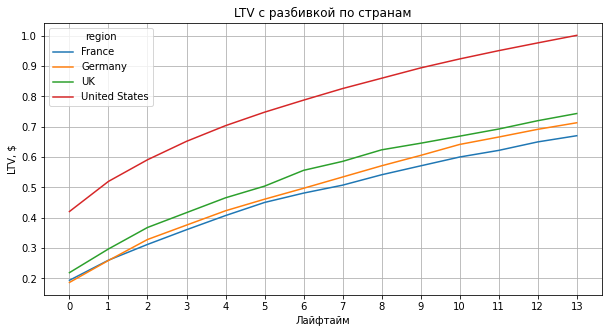

In [68]:
# кривые LTV
report = ltv.drop(columns=['cohort_size'])
report.T.plot(grid=True, figsize=(10, 5), xticks=list(report.columns.values))
plt.title('LTV с разбивкой по странам')
plt.ylabel('LTV, $')
plt.xlabel('Лайфтайм')
plt.show()

In [69]:
# находим максимальную дату привлечения из сырых данных LTV
max_acquitision_dt = ltv_raw['dt'].max()
# отсекаем профили, которые «старше» этой даты
ltv_profiles = profiles.query('dt <= @max_acquitision_dt')

# оставшееся число пользователей на каждый лайфтайм
ltv_profiles.groupby('dt').agg({'user_id': 'nunique'}).sort_values(by='user_id', ascending=False).head()

,user_id
dt,
2019-09-29,859
2019-09-28,850
2019-09-27,777
2019-09-22,768
2019-09-30,764


In [70]:
# считаем средний CAC по каналам привлечения

cac = (ltv_profiles.groupby('region').agg({'acquisition_cost': 'mean'}).rename(columns={'acquisition_cost': 'cac'}))
cac


,cac
region,
France,0.459836
Germany,0.464898
UK,0.454922
United States,1.455876


In [71]:
# рассчитываем LTV и ROI
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv5(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['region'])

roi

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
region,,,,,,,,,,,,,,,,
France,10516,0.459836,0.420645,0.564947,0.677842,0.783319,0.884863,0.978985,1.046066,1.103029,1.177559,1.241542,1.304903,1.352373,1.413265,1.457644
Germany,9030,0.464898,0.400840,0.556806,0.705411,0.807645,0.909395,0.991414,1.068917,1.148797,1.228449,1.302148,1.379887,1.432426,1.487111,1.533709
UK,10536,0.454922,0.480704,0.652335,0.808109,0.915777,1.023264,1.107802,1.222385,1.287350,1.371094,1.418984,1.470208,1.521847,1.582249,1.634306
United States,58562,1.455876,0.288682,0.356923,0.405928,0.447689,0.483222,0.513729,0.541018,0.567254,0.590622,0.613990,0.634347,0.653111,0.670649,0.687776


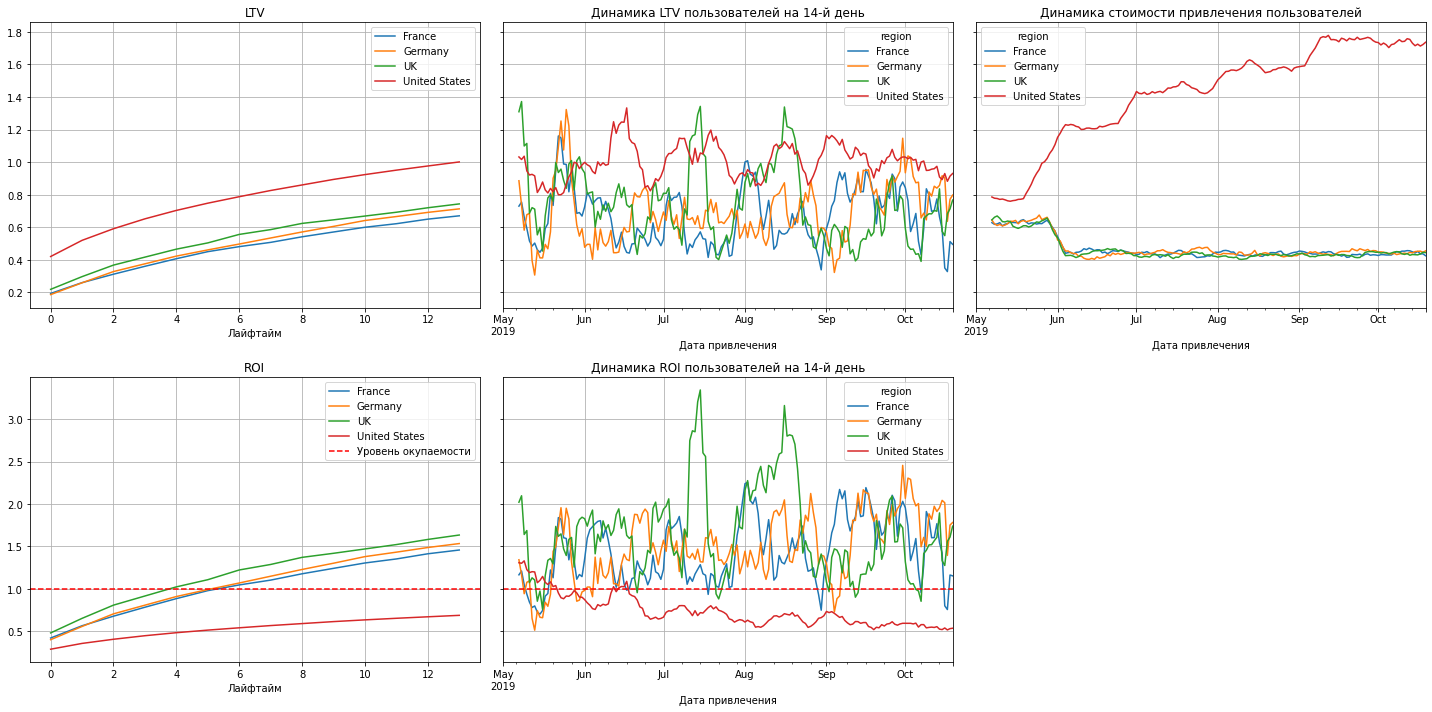

In [72]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14) 

In [73]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['region']
)

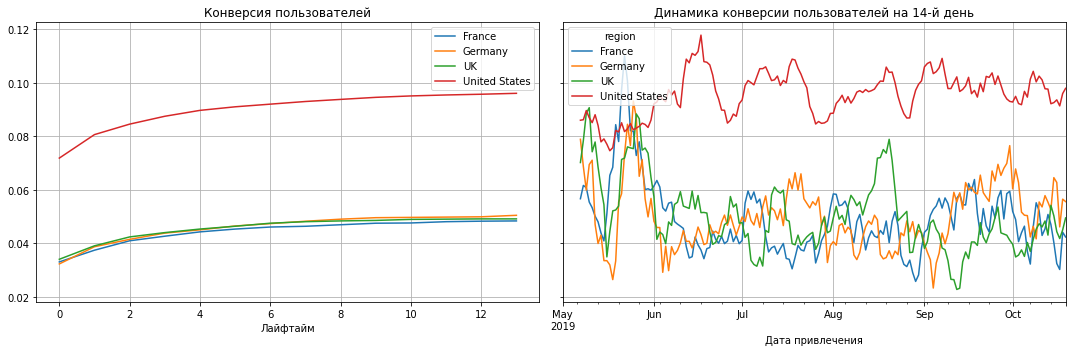

In [74]:
plot_conversion(conversion, conversion_history, 14) 

In [75]:
retention_raw, retention, retention_history = get_retention(
    profiles,
    visits,
    datetime(2019, 11, 1).date(),
    14,
    dimensions=['region'],
)
 

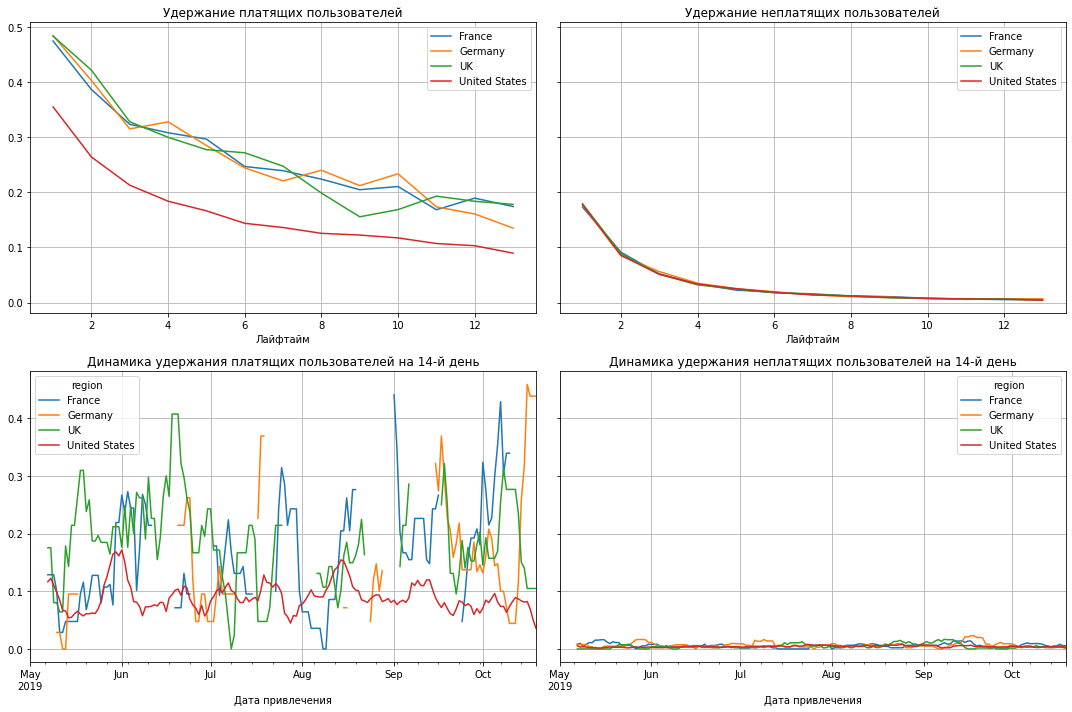

In [76]:
plot_retention7(retention, retention_history, 14) 

Таким образом, судя по графику, самый высокий LTV — у пользователей из США. Затем идут Великобритания и Германия. Пользователи из Франция приносят меньше всего выручки.
Стоимость привлечения пользователей из США, в началае анализируемого периода незначительно отличалась от иных регионов. Увеличение финансирования в этих странах на привлечение одного пользователя в США в начале составляло 40 центов, когда к концу составило больше 1 доллара.
ROI окупаемость рекламы провалилась во всех регионах, но при этом отдельные свплески замечены в Великобритании, Германии и Франции. В США не окупилась вовсе.

### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам

In [77]:
# LTV с разбивкой по каналам привлечения
ltv_raw, ltv, ltv_history = get_ltv(profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['channel'])

# таблица LTV
display(ltv)

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,
AdNonSense,3702,0.505030,0.589149,0.644417,0.683509,0.706694,0.732582,0.754149,0.767628,0.789203,0.802682,0.806996,0.815084,0.827215,0.838006
FaceBoom,27544,0.585703,0.660825,0.700722,0.728842,0.747143,0.760369,0.774718,0.784757,0.792404,0.800775,0.806247,0.812226,0.817483,0.821469
LeapBob,8103,0.107048,0.155702,0.205583,0.235391,0.259654,0.288599,0.314587,0.333802,0.369543,0.394176,0.417579,0.437902,0.457608,0.473004
MediaTornado,4167,0.137485,0.191615,0.246943,0.293667,0.332249,0.366979,0.388534,0.418474,0.440034,0.461589,0.485541,0.508294,0.526256,0.533684
OppleCreativeMedia,8139,0.097239,0.131578,0.171686,0.206636,0.241103,0.266240,0.290152,0.309527,0.328544,0.346938,0.364228,0.376613,0.395017,0.409118
RocketSuperAds,4251,0.207570,0.318640,0.396114,0.455980,0.515613,0.571019,0.639125,0.687255,0.737986,0.790118,0.831437,0.864307,0.898586,0.933801
TipTop,18498,0.343550,0.497389,0.624141,0.739834,0.842358,0.935707,1.013676,1.096450,1.171400,1.245485,1.311417,1.371467,1.427640,1.487908
WahooNetBanner,8082,0.191302,0.291477,0.378921,0.443754,0.516862,0.569469,0.631870,0.678176,0.725353,0.765488,0.812535,0.849334,0.889472,0.918615
YRabbit,4102,0.163301,0.213423,0.256000,0.303932,0.356265,0.387894,0.414656,0.438988,0.460885,0.480349,0.502245,0.524147,0.546287,0.559668


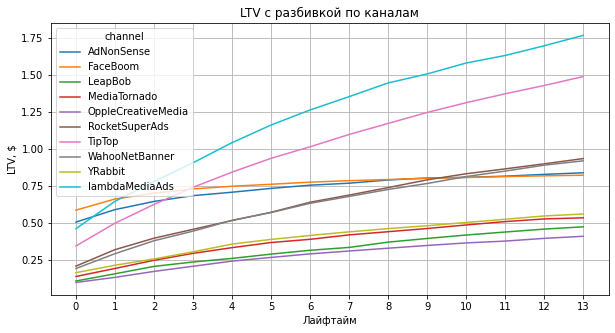

In [78]:
# кривые LTV
report = ltv.drop(columns=['cohort_size'])
report.T.plot(grid=True, figsize=(10, 5), xticks=list(report.columns.values))
plt.title('LTV с разбивкой по каналам')
plt.ylabel('LTV, $')
plt.xlabel('Лайфтайм')
plt.show()

In [79]:
# находим максимальную дату привлечения из сырых данных LTV
max_acquitision_dt = ltv_raw['dt'].max()
# отсекаем профили, которые «старше» этой даты
ltv_profiles = profiles.query('dt <= @max_acquitision_dt')

# оставшееся число пользователей на каждый лайфтайм
ltv_profiles.groupby('dt').agg({'user_id': 'nunique'}).sort_values(by='user_id', ascending=False).head()

,user_id
dt,
2019-09-29,859
2019-09-28,850
2019-09-27,777
2019-09-22,768
2019-09-30,764


In [80]:
# считаем средний CAC по каналам привлечения

cac = (ltv_profiles.groupby('channel').agg({'acquisition_cost': 'mean'}).rename(columns={'acquisition_cost': 'cac'}))
cac


,cac
channel,
AdNonSense,1.008023
FaceBoom,1.113419
LeapBob,0.210000
MediaTornado,0.219035
OppleCreativeMedia,0.249908
RocketSuperAds,0.417431
TipTop,2.757774
WahooNetBanner,0.601856
YRabbit,0.217087


In [81]:
roi = ltv.div(cac['cac'], axis=0)
roi = roi[~roi['cohort_size'].isin([np.inf])]
roi.loc[:, 'cohort_size'] = ltv['cohort_size']
roi

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,
AdNonSense,3702,0.501010,0.584460,0.639288,0.678069,0.701069,0.726752,0.748147,0.761519,0.782922,0.796294,0.800573,0.808597,0.820631,0.831337
FaceBoom,27544,0.526040,0.593510,0.629343,0.654599,0.671035,0.682914,0.695801,0.704818,0.711685,0.719204,0.724119,0.729488,0.734210,0.737790
LeapBob,8103,0.509752,0.741436,0.978967,1.120908,1.236450,1.374282,1.498034,1.589535,1.759730,1.877030,1.988470,2.085248,2.179087,2.252399
MediaTornado,4167,0.627684,0.874814,1.127410,1.340729,1.516873,1.675432,1.773841,1.910531,2.008962,2.107371,2.216726,2.320602,2.402610,2.436519
OppleCreativeMedia,8139,0.389100,0.526504,0.686996,0.826849,0.964769,1.065354,1.161037,1.238564,1.314661,1.388265,1.457448,1.507006,1.580649,1.637075
RocketSuperAds,4251,0.497256,0.763336,0.948932,1.092347,1.235204,1.367935,1.531090,1.646391,1.767923,1.892809,1.991795,2.070538,2.152657,2.237019
TipTop,18498,0.124575,0.180359,0.226321,0.268272,0.305449,0.339298,0.367570,0.397585,0.424763,0.451627,0.475535,0.497310,0.517679,0.539532
WahooNetBanner,8082,0.317853,0.484298,0.629588,0.737309,0.858780,0.946188,1.049868,1.126808,1.205193,1.271878,1.350049,1.411192,1.477881,1.526304
YRabbit,4102,0.752238,0.983122,1.179250,1.400049,1.641119,1.786814,1.910094,2.022179,2.123045,2.212703,2.313569,2.414457,2.516446,2.578086


In [82]:
# рассчитываем LTV и ROI

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv5(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['channel']
)

roi  # таблица ROI

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,,
AdNonSense,3702,1.008023,0.501010,0.584460,0.639288,0.678069,0.701069,0.726752,0.748147,0.761519,0.782922,0.796294,0.800573,0.808597,0.820631,0.831337
FaceBoom,27544,1.113419,0.526040,0.593510,0.629343,0.654599,0.671035,0.682914,0.695801,0.704818,0.711685,0.719204,0.724119,0.729488,0.734210,0.737790
LeapBob,8103,0.210000,0.509752,0.741436,0.978967,1.120908,1.236450,1.374282,1.498034,1.589535,1.759730,1.877030,1.988470,2.085248,2.179087,2.252399
MediaTornado,4167,0.219035,0.627684,0.874814,1.127410,1.340729,1.516873,1.675432,1.773841,1.910531,2.008962,2.107371,2.216726,2.320602,2.402610,2.436519
OppleCreativeMedia,8139,0.249908,0.389100,0.526504,0.686996,0.826849,0.964769,1.065354,1.161037,1.238564,1.314661,1.388265,1.457448,1.507006,1.580649,1.637075
RocketSuperAds,4251,0.417431,0.497256,0.763336,0.948932,1.092347,1.235204,1.367935,1.531090,1.646391,1.767923,1.892809,1.991795,2.070538,2.152657,2.237019
TipTop,18498,2.757774,0.124575,0.180359,0.226321,0.268272,0.305449,0.339298,0.367570,0.397585,0.424763,0.451627,0.475535,0.497310,0.517679,0.539532
WahooNetBanner,8082,0.601856,0.317853,0.484298,0.629588,0.737309,0.858780,0.946188,1.049868,1.126808,1.205193,1.271878,1.350049,1.411192,1.477881,1.526304
YRabbit,4102,0.217087,0.752238,0.983122,1.179250,1.400049,1.641119,1.786814,1.910094,2.022179,2.123045,2.212703,2.313569,2.414457,2.516446,2.578086


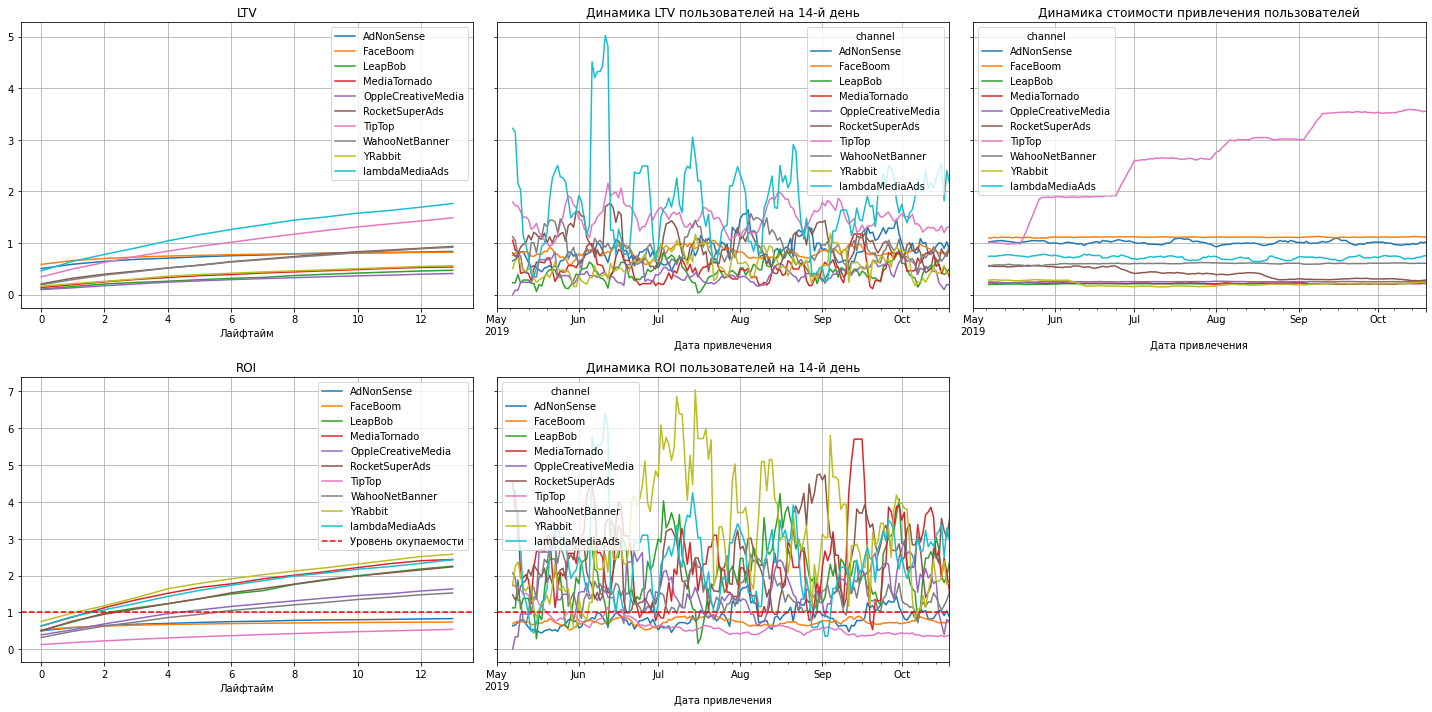

In [83]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14) 

In [84]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['channel']
)

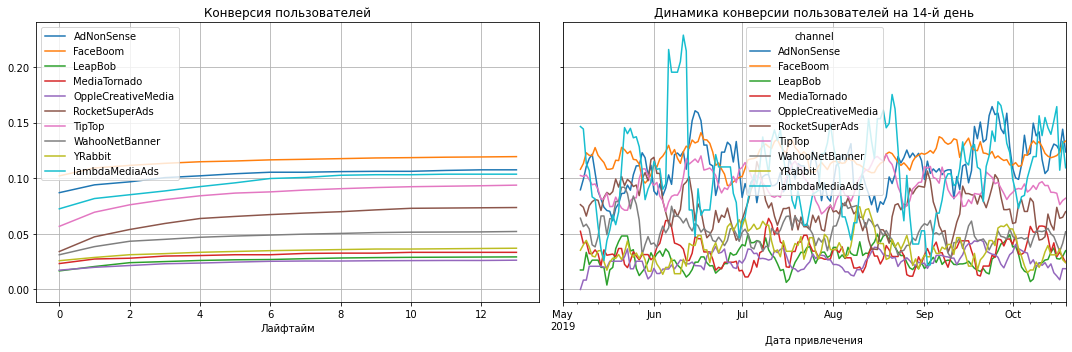

In [85]:
plot_conversion(conversion, conversion_history, 14) 

In [86]:
retention_raw, retention, retention_history = get_retention(
    profiles,
    visits,
    datetime(2019, 11, 1).date(),
    14,
    dimensions=['channel'],
)
 

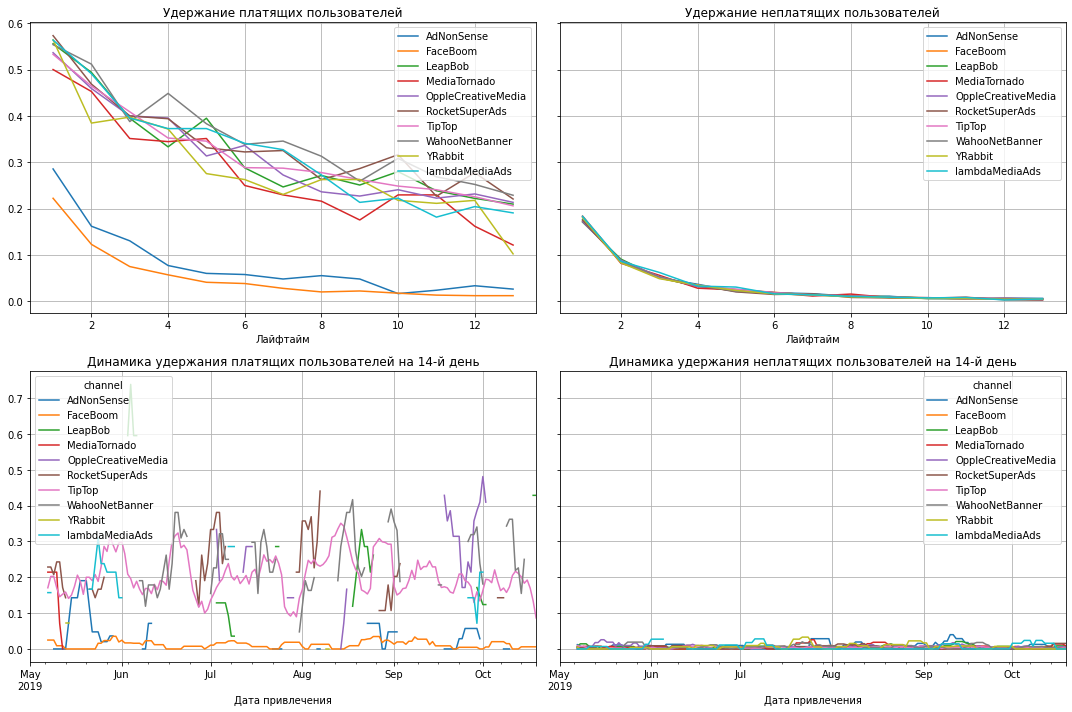

In [87]:
plot_retention7(retention, retention_history, 14) 

Таким образом, судя по графику, самый высокий LTV — у пользователей, пришедших из FaceBoom и TipTop. Пользователи из OppleCreativeMedia приносят меньше всего выручки. 
ROI окупаемость рекламы провалилась в таких каналах как FaceBoom, OppleCreativeMedia, TipTop, WahooNetBanner. При этом хорошие показатели дал канал YRabbit: до июня не превышал уровень окупаемости, после превышал уровень окупаемости. И только 6 каналов превысили уровень окупаемости.

# Шаг 6. Напишите выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

По результатам анализа можно следать вывод, что основной причиной неэффективного привлечения пользователей является некорректное определение приоритетности финансирования. Так, основное финансорование рекламы направлено исключительно на пользователей США, отсутствует должное внимание на иные регионы. Увеличение финансирования на канал Tiptop предполагаю, что обусловлено появлением этого нового канала, но должного результата такие действия не дали.

Предлагаю провести анализ категорий пользователей приложения и расширить распространение рекламы в других регионах. 
Не следует определять одно направление и не прорабатывать привлечения иыми

Реклама в США - не приносит привлечения пользоватлей в приложение. Ни в один момент анализируемого периода точку окупаемости не была превышена. Однако, что затраты на маркетинг в данном регионе значительно превышают другие. Следует пересмотреть распредение затрат и направить финансирование в европейские страны

Стоимость привлечения пользователей из TipTop, в течении анализируемого периода незначительно отличалась от иных каналов. Увеличение финансирования в этом канале на привлечение одного пользователя: в начале составляло 1 доллар, когда к концу составило больше 3,5 доллара. Данный рост связан с появлением данного канала на рынке и быстрому росту его популярности. но к сожалению увеличение финансирования на меркетинг не дало результаты.

Как показано на графике удержания самый низкиий показатель имеет канал FaceBoom. Он изначально отстает от других каналов примерно на 0,4 пункта. При этом конверсия пользователей из этого канала занимает высокие позиции по сравнению с остальными.
Сделует отметить, что инвестиции в этот канал окупились уже на 3 день привлечения

В ходе анализа выявлен прибыльный девайс - РС. Предлагаю рассмотреть увеличение финансирования в данном направлении